# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

I'll start with the data from the BRFSS again.

In [3]:
df = brfss.ReadBrfss(nrows=None)

In [4]:
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0


Here are the mean and standard deviation of female height in cm.

In [5]:
female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

(163.22347500412215, 7.269156286641344)

`NormalPdf` returns a Pdf object that represents the normal distribution with the given parameters.

`Density` returns a probability density, which doesn't mean much by itself.

In [6]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.03328731904744125

In [7]:
# Mine
fht_norm_rv = stats.norm(loc=mean, scale=std)
fht_norm_rv.pdf(mean + std)

0.03328731904744125

`thinkplot` provides `Pdf`, which plots the probability density with a smooth curve.

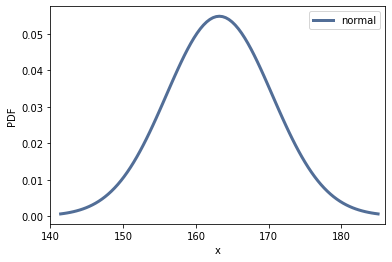

In [8]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [9]:
# Mine
def NormalPdfValues(mean, std, n=1001):
    xmin = mean - 4 * std
    xmax = mean + 4 * std
    xs = np.linspace(xmin, xmax, n)
    ps = stats.norm.pdf(xs, loc=mean, scale=std)
    return xs, ps

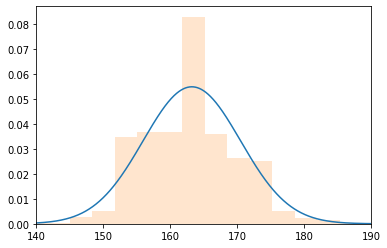

In [10]:
fht_xs, fht_ps = NormalPdfValues(mean, std)

fig,ax = plt.subplots()

ax.plot(fht_xs, fht_ps)

ax.hist(female_heights, bins=50, density=True, histtype='stepfilled', alpha=0.2) # Just added to see what it looks like

ax.set_xlim(140,190)

plt.show()

In [11]:
# Try a normal probability plot for this
def NormalProbabilityValues(a):
    """Creates x and y values to be used in a normal probability plot.

    Arguments:
        a {array-like} -- a single input data set

    Returns:
        sorted_norm {list} -- Sorted random data from the standard normal distribution,
        that is the same length as the input data. To be used as x values.

        sorted_data: {list} -- Sorted input data to be used as y values.
    """
    sorted_norm = sorted(np.random.normal(0,1,len(a)))
    sorted_data = sorted(a)
    
    return sorted_norm, sorted_data

In [12]:
def FitLine(xs, inter, slope):
    """Generates x and y values to plot a model fitline.

    Arguments:
        xs {array-like} -- sequence of xs (for std normal distribution can just choose values that cover the range of the data (ie.[-5,5]))
        inter {float} -- intercept of the line (for std normal distribution this is the mean of the data)
        slope {float} -- slope of the line (for std normal distribution this is the standard deviation of the data)

    Returns:
        A tuple of numpy arrays (sorted xs, fit ys)
    """
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    
    return fit_xs, fit_ys

In [13]:
female_heights.mean(), female_heights.std()

(163.22347500412215, 7.269156286641344)

In [14]:
fit_xs, fit_ys = FitLine([-5,5], female_heights.mean(), female_heights.std())

In [15]:
xs,ys = NormalProbabilityValues(female_heights)

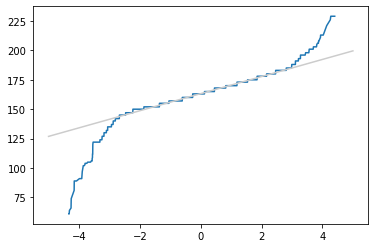

In [16]:
# a normal probability plot shows that the data is normal within 3 standard deviations of the mean
fig,ax = plt.subplots()

ax.plot(xs,ys)

ax.plot(fit_xs,fit_ys, color='0.8')

In [17]:
# Plot 

`Pdf` provides `MakePmf`, which returns a `Pmf` object that approximates the `Pdf`. 

In [18]:
# Trying out the .fit method for norm, this method also works to get parameters for other distributions like expon and pareto
# Note that after some testing and Googling pareto is very difficult to use, must have very accurate guesses to start with
test_loc,test_scale = stats.norm.fit(female_heights)
test_loc,test_scale

(163.22347500412215, 7.269142017824814)

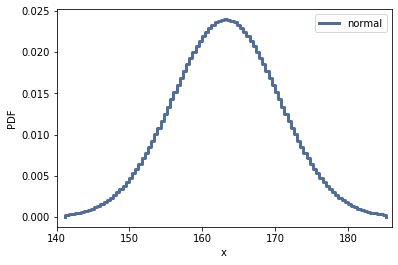

In [19]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

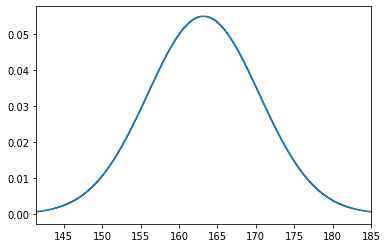

In [20]:
# Mine, just used step plot instead but steps are small so hard to see
fig,ax = plt.subplots()

ax.step(fht_xs, fht_ps)

ax.set_xlim((female_heights.mean()-(3*female_heights.std())),
            (female_heights.mean()+(3*female_heights.std())))

plt.show()

If you have a `Pmf`, you can also plot it using `Pdf`, if you have reason to think it should be represented as a smooth curve.

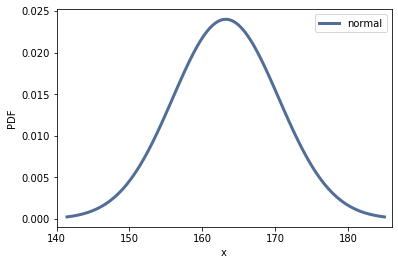

In [21]:
thinkplot.Pdf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

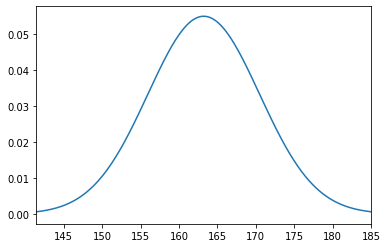

In [22]:
# Mine, just used plot instead of the step above
fig,ax = plt.subplots()

ax.plot(fht_xs, fht_ps)

ax.set_xlim((female_heights.mean()-(3*female_heights.std())),
            (female_heights.mean()+(3*female_heights.std())))

plt.show()

Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).

If you run this a few times, you'll see how much variation there is in the estimate.

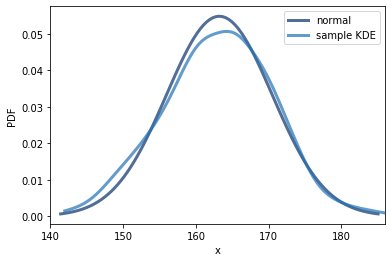

In [23]:
thinkplot.Pdf(pdf, label='normal')

sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

(141.41600614419812, 185.03094386404618)

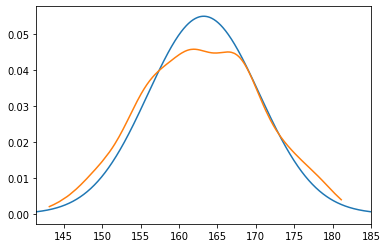

In [24]:
# Mine, I will just use the same mean and std as the book's above

# Create the kde_rv from a sample
my_sample = sorted(np.random.normal(mean, std, 500))
kde_rv = stats.gaussian_kde(my_sample)

fig,ax = plt.subplots()

# Plot the model pdf, using values produced by my function above
ax.plot(fht_xs, fht_ps)

# Plot the kde
ax.plot(my_sample, kde_rv.evaluate(my_sample))

ax.set_xlim((female_heights.mean()-(3*female_heights.std())),
            (female_heights.mean()+(3*female_heights.std())))

(141.41600614419812, 185.03094386404618)

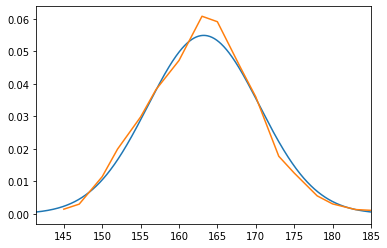

In [25]:
# Also try plotting the kde of the actual data vs a model

# Create the kde_rv from the data, had to use a sample because data set is too large and take too long to run
data_sample = sorted(np.random.choice(female_heights, size=500))
kde_rv = stats.gaussian_kde(data_sample)

fig,ax = plt.subplots()

# Plot the model pdf, using values produced by my function above
ax.plot(fht_xs, fht_ps)

# Plot the kde
ax.plot(data_sample, kde_rv.evaluate(data_sample))

ax.set_xlim((female_heights.mean()-(3*female_heights.std())),
            (female_heights.mean()+(3*female_heights.std())))

## Moments

Raw moments are just sums of powers.

In [26]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

The first raw moment is the mean.  The other raw moments don't mean much.

In [27]:
RawMoment(female_heights, 1), RawMoment(female_heights, 2), RawMoment(female_heights, 3)

(163.22347500412215, 26694.74321809659, 4374411.46250422)

In [28]:
# Mine
def DiscreteRv(a):
    """Creates a scipy.stats discrete_rv.

    Arguments:
        a {array-like} -- a single data set, will be flattened if it is not already 1-D

    Returns:
        An instance of scipy.stats discrete_rv representing the input data
    """
    val,cnt = np.unique(a, return_counts=True)
    
    return stats.rv_discrete(values=(val,cnt/sum(cnt)))

In [29]:
fh_rv = DiscreteRv(female_heights)

In [30]:
fh_rv.moment(1), fh_rv.moment(2), fh_rv.moment(3)

(163.22347500412215, 26694.74321809659, 4374411.462504221)

In [31]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(female_heights)

163.22347500412215

The central moments are powers of distances from the mean.

In [32]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

The first central moment is approximately 0.  The second central moment is the variance.

In [33]:
CentralMoment(female_heights, 1), CentralMoment(female_heights, 2), CentralMoment(female_heights, 3)

(-9.903557940122168e-14, 52.84042567529328, -46.88569506887073)

In [34]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(female_heights)

52.84042567529328

The standardized moments are ratios of central moments, with powers chosen to make the dimensions cancel.

In [35]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

The third standardized moment is skewness.

In [36]:
StandardizedMoment(female_heights, 1), StandardizedMoment(female_heights, 2), StandardizedMoment(female_heights, 3)

(-1.3624108479155668e-14, 1.0, -0.1220649274510512)

In [37]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(female_heights)

-0.1220649274510512

In [38]:
# Mine, I can just use the stats method to return the mean, variance, and skew
m,v,s = fh_rv.stats(moments='mvs')
m,v,s

(array(163.223475), array(52.84042568), array(-0.12206493))

In [39]:
# Extract the value of s, for example
float(s)

-0.1220649274443362

Normally a negative skewness indicates that the distribution has a longer tail on the left.  In that case, the mean is usually less than the median.

In [40]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

But in this case the mean is greater than the median, which indicates skew to the right.

In [41]:
Mean(female_heights), Median(female_heights)

(163.22347500412215, 163.0)

Because the skewness is based on the third moment, it is not robust; that is, it depends strongly on a few outliers.  Pearson's median skewness is more robust.

In [42]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

Pearson's skewness is positive, indicating that the distribution of female heights is slightly skewed to the right.

In [43]:
PearsonMedianSkewness(female_heights)

0.0922289055190516

In [44]:
# Mine, can't seem to find a scipy stats method that replicates the pearson method above
stats.skew(female_heights, bias=False)

-0.12206564626888979

In [45]:
# But as the author mentions the mean is greater than the median which indicates right skew, not left
# A good conclusion here is that there is not clear skew I think
# Good practice to check both the calculated skew and how the mean & median compare to each other
female_heights.median(), female_heights.mean()

(163.0, 163.22347500412215)

## Birth weights

Let's look at the distribution of birth weights again.

In [46]:
import first

live, firsts, others = first.MakeFrames()

Based on KDE, it looks like the distribution is skewed to the left.

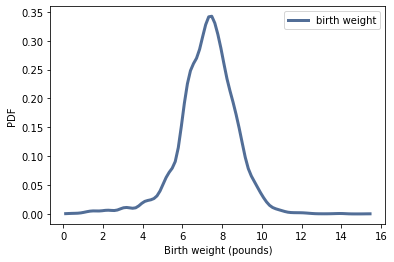

In [47]:
birth_weights = live.totalwgt_lb.dropna()
pdf = thinkstats2.EstimatedPdf(birth_weights)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PDF')

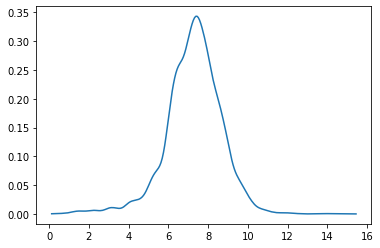

In [48]:
# Mine
birth_weights_sorted = birth_weights.sort_values()

birth_kde = stats.gaussian_kde(birth_weights_sorted)

fig,ax = plt.subplots()

ax.plot(birth_weights_sorted, birth_kde.evaluate(birth_weights_sorted))

The mean is less than the median, which is consistent with left skew.

In [49]:
Mean(birth_weights), Median(birth_weights)

(7.265628457623368, 7.375)

In [50]:
# Mine
birth_weights_sorted.mean(), birth_weights_sorted.median()

(7.265628457623368, 7.375)

And both ways of computing skew are negative, which is consistent with left skew.

In [51]:
Skewness(birth_weights), PearsonMedianSkewness(birth_weights)

(-0.5895062687577989, -0.23300028954731833)

## Adult weights

Now let's look at adult weights from the BRFSS.  The distribution looks skewed to the right.

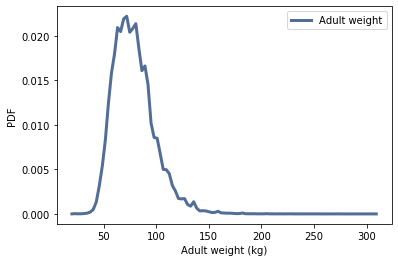

In [52]:
adult_weights = df.wtkg2.dropna()
pdf = thinkstats2.EstimatedPdf(adult_weights)
thinkplot.Pdf(pdf, label='Adult weight')
thinkplot.Config(xlabel='Adult weight (kg)', ylabel='PDF')

In [66]:
def KdeValues(sample, n=101):
    """Generates sequences of x and y values for a kernel density estimation (kde) plot.

    Arguments:
        sample {array-like} -- A single input data set

    Keyword Arguments:
        n {int} -- The number of x values to use (default: {101})

    Returns:
        xs {array} -- The values to use for x in a kde plot
        ys {array} -- The values to use for y in a kde plot
    """
    xs = np.linspace(min(sample), max(sample), n)
    sorted_sample = sorted(sample)
    kde = stats.gaussian_kde(sorted_sample)
    ys = kde.evaluate(xs)
    return xs,ys

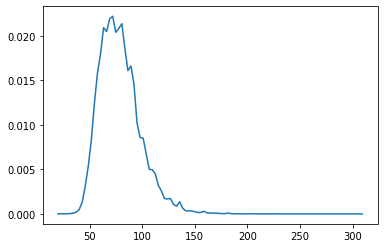

In [67]:
# sorted_weights = adult_weights.sort_values()
# x_values = np.linspace(sorted_weights.min(), sorted_weights.max(), 101)
# wt_kde = stats.gaussian_kde(sorted_weights)

fig,ax = plt.subplots()

xs,ys = KdeValues(adult_weights, n=101)

ax.plot(xs,ys)
plt.show()

The mean is greater than the median, which is consistent with skew to the right.

In [55]:
Mean(adult_weights), Median(adult_weights)

(78.99245299687198, 77.27)

In [69]:
# Mine
adult_weights.mean(), adult_weights.median()

(78.99245299687198, 77.27)

And both ways of computing skewness are positive.

In [56]:
Skewness(adult_weights), PearsonMedianSkewness(adult_weights)

(1.054840012109306, 0.2643673381618039)

In [70]:
# Mine
stats.skew(adult_weights)

1.0548400121120605

## Exercises

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

In [57]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [58]:
import hinc
income_df = hinc.ReadData()

In [59]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

C:\Users\pthus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


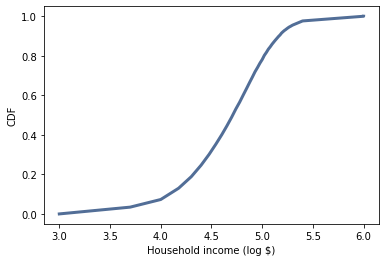

In [60]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [61]:
sample = np.power(10, log_sample)

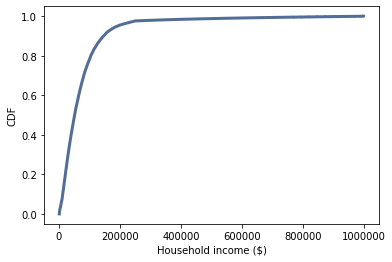

In [62]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [74]:
# Solution goes here
sample_series = pd.Series(sample)
sample_series.median(), sample_series.mean(), stats.skew(sample)

(51226.93306562372, 74278.70753118733, 4.949920244429584)

In [75]:
# Solution goes here
def DiscreteRv(a):
    """Creates a scipy.stats discrete_rv.

    Arguments:
        a {array-like} -- a single data set, will be flattened if it is not already 1-D

    Returns:
        An instance of scipy.stats discrete_rv representing the input data
    """
    val,cnt = np.unique(a, return_counts=True)
    
    return stats.rv_discrete(values=(val,cnt/sum(cnt)))

In [76]:
income_rv = DiscreteRv(sample)

In [78]:
income_rv.cdf(sample.mean())

0.660005879566784

In [79]:
# Solution goes here, raise the upper bound to 10 million from 1 million
log_sample2 = InterpolateSample(income_df, log_upper=7.0)

C:\Users\pthus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


In [80]:
sample2 = np.power(10, log_sample2)

In [81]:
# If we raise the upper bound to 10 million then the fraction of households under the mean increase by 20%
income_rv = DiscreteRv(sample2)
income_rv.cdf(sample2.mean())

0.8565630665214141

All of this is based on an assumption that the highest income is one million dollars, but that's certainly not correct.  What happens to the skew if the upper bound is 10 million?

Without better information about the top of this distribution, we can't say much about the skewness of the distribution.

In [83]:
# The skew increases dramatically too
stats.skew(sample2)

11.603690267537788